In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

data = pd.read_csv('data/train.csv')

# 2. Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('Cover_Type', axis=1)  
X = X.drop('Id', axis=1)
y = data['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# 4. Выбор модели
model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [2]:
data_ = data

a = []
for i in range(len(data)):
    for x in range(1, 5):
        if data["Wilderness_Area" + str(x)][i]:
            a.append(x-1)

for x in range(1, 5):
    data_ = data_.drop("Wilderness_Area" + str(x), axis=1)

data_['Wilderness_Area'] = a

a.clear()
for i in range(len(data)):
    for x in range(1, 41):
        if data["Soil_Type" + str(x)][i]:
            a.append(x-1)

for x in range(1, 41):
    data_ = data_.drop("Soil_Type" + str(x), axis=1)

data_['Soil_Type'] = a

In [3]:
X_new = data_.drop('Cover_Type', axis=1)
X_new = X_new.drop('Id', axis=1)

X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42) 


In [38]:

# 6. Обучение модели
model.fit(X_train, y_train)
score = model.score(X_test, y_test)


                                    importance
Elevation                             0.231648
Horizontal_Distance_To_Roadways       0.096843
Horizontal_Distance_To_Fire_Points    0.072048
Horizontal_Distance_To_Hydrology      0.064906
Vertical_Distance_To_Hydrology        0.053074
Hillshade_9am                         0.051073
Aspect                                0.049657
Hillshade_3pm                         0.047461
Hillshade_Noon                        0.044940
Slope                                 0.036711
Wilderness_Area4                      0.035651
Soil_Type10                           0.022845
Wilderness_Area1                      0.019623
Soil_Type3                            0.019079
Soil_Type38                           0.018584
Wilderness_Area3                      0.018445
Soil_Type39                           0.015570
Soil_Type4                            0.012186
Soil_Type40                           0.009041
Soil_Type30                           0.007931
Soil_Type2   

<Axes: >

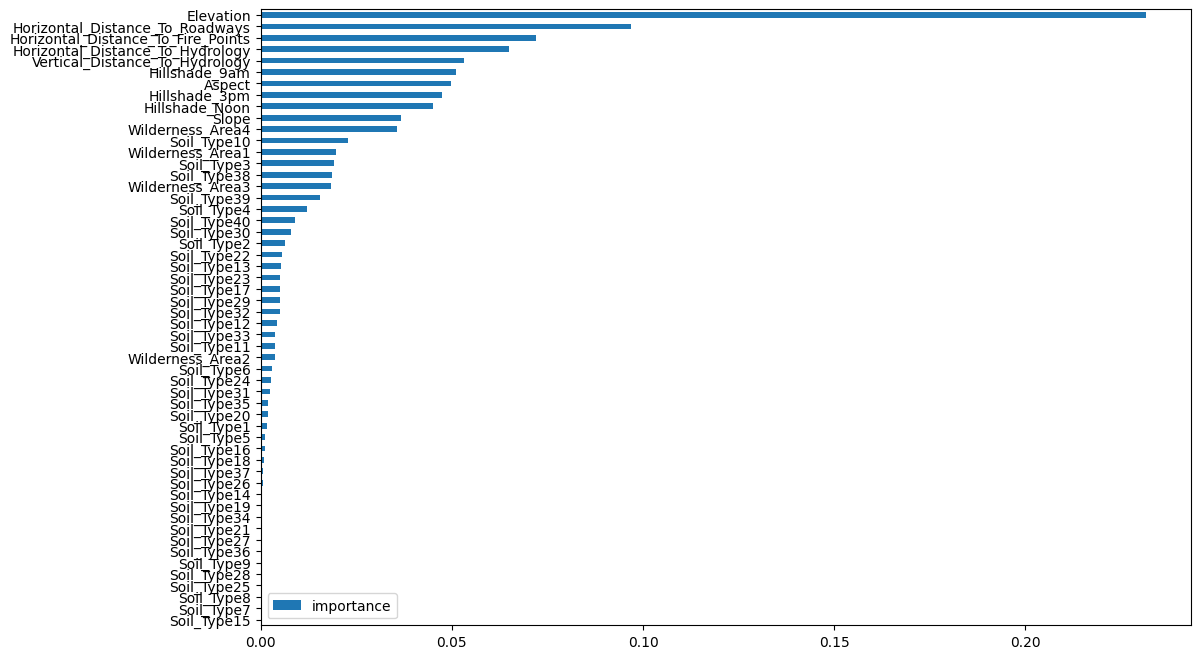

In [43]:
imp = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance'])
print(imp.sort_values('importance')[::-1])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [6]:

# 5. Кросс-валидация
# Используем 5-кратную кросс-валидацию
cv_scores = cross_val_score(model, X_new_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)



In [7]:

print(f'Test accuracy: {score:.4f}')


# Вывод результатов кросс-валидации
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {np.mean(cv_scores):.4f}')
print(f'Max CV accuracy: {np.max(cv_scores):.4f}')
print(f'Min CV accuracy: {np.min(cv_scores):.4f}')



Test accuracy: 0.8724
Cross-validation scores: [0.84173554 0.8491112  0.85159157 0.8358826  0.84704423]
Mean CV accuracy: 0.8451
Max CV accuracy: 0.8516
Min CV accuracy: 0.8359


In [74]:
d1 = {}


for n_estimators in range(150, 401, 5):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    print(f'{n_estimators}: {score}')
    d1[n_estimators] = score

d1 = sorted(d1.items(), key=lambda item: item[1])[::-1]
d1
d1_best = d1[0]
print(d1_best)


150: 0.8700396825396826
155: 0.871031746031746
160: 0.8707010582010583
165: 0.8703703703703703
170: 0.8713624338624338
175: 0.8690476190476191
180: 0.8687169312169312
185: 0.8687169312169312
190: 0.8687169312169312
195: 0.8700396825396826
200: 0.8707010582010583
205: 0.8700396825396826
210: 0.8716931216931217
215: 0.8716931216931217
220: 0.8716931216931217
225: 0.8716931216931217
230: 0.871031746031746
235: 0.871031746031746
240: 0.8716931216931217
245: 0.8713624338624338
250: 0.8720238095238095
255: 0.871031746031746
260: 0.8707010582010583
265: 0.871031746031746
270: 0.8716931216931217
275: 0.8703703703703703
280: 0.8703703703703703
285: 0.8713624338624338
290: 0.8716931216931217
295: 0.8720238095238095
300: 0.8716931216931217
305: 0.8720238095238095
310: 0.8726851851851852
315: 0.8726851851851852
320: 0.8716931216931217
325: 0.8726851851851852
330: 0.873015873015873
335: 0.8723544973544973
340: 0.8723544973544973
345: 0.8726851851851852
350: 0.8726851851851852
355: 0.873015873015873

In [75]:
criterions = ['gini', 'entropy', 'log_loss']

d2 = {}
for criterion in criterions:
    rf = RandomForestClassifier(criterion=criterion, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    print(f'{criterion}: {score}')
    d2[criterion] = score

d2 = sorted(d2.items(), key=lambda item: item[1])[::-1]
d2
d2_best = d2[0]
print(d2_best)

gini: 0.8673941798941799
entropy: 0.8670634920634921
log_loss: 0.8670634920634921
('gini', 0.8673941798941799)


In [76]:

d3 = {}
for max_depth in range(25, 81, 5):
    rf = RandomForestClassifier(max_depth=max_depth, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    print(f'{max_depth}: {score}')
    d3[max_depth] = score

d3 = sorted(d3.items(), key=lambda item: item[1])[::-1]
d3
d3_best = d3[0]
print(d1_best)

25: 0.8664021164021164
30: 0.8673941798941799
35: 0.8687169312169312
40: 0.8670634920634921
45: 0.8673941798941799
50: 0.8673941798941799
55: 0.8673941798941799
60: 0.8673941798941799
65: 0.8673941798941799
70: 0.8673941798941799
75: 0.8673941798941799
80: 0.8673941798941799
(355, 0.873015873015873)


In [80]:
model = RandomForestClassifier(n_estimators=d1_best[0], max_depth=d3_best[0], random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(f'{score}')

0.8673941798941799


In [90]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real

param_space = {
    'n_estimators': Integer(180, 200),
    'max_depth': Integer(50, 60),
    'min_samples_leaf': Integer(1, 2),
    'max_features': Real(0.4, 0.6, prior='uniform')
}

# Создание модели и настройка с использованием байесовской оптимизации
rf_model = RandomForestClassifier()
bayes_search = BayesSearchCV(rf_model, param_space, n_iter=20, cv=5, n_jobs=-1)
bayes_search.fit(X_train, y_train)

# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", bayes_search.best_params_)
print("Best Cross-Validation Score:", bayes_search.best_score_)

rf = bayes_search.best_estimator_
print(rf.score(X_test, y_test))

Best Hyperparameters: OrderedDict({'max_depth': 54, 'max_features': 0.5210786820544161, 'min_samples_leaf': 1, 'n_estimators': 184})
Best Cross-Validation Score: 0.8571433110465018
0.8723544973544973


In [8]:

param_grid = {
    'n_estimators': range(50, 201, 10),
    'max_depth': [None]+list(range(5, 101, 5)),
    'min_samples_split': range(2, 9),
    'min_samples_leaf': range(1, 9)
}


# Настройка RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=16, cv=5, scoring='accuracy', n_jobs=-1, 
                                   random_state=42)


# Обучение модели
random_search.fit(X_new_train, y_train)

# Лучшие гиперпараметры
print("Лучшие гиперпараметры:", random_search.best_params_)
print(f'Лучшая точность: {random_search.best_score_:.4f}')
# Оценка на тестовой выборке
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_new_test, y_test)
print("Тестовая точность:", test_accuracy)


Лучшие гиперпараметры: {'n_estimators': 190, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Лучшая точность: 0.8483
Тестовая точность: 0.8726851851851852


In [9]:
best_model = RandomForestClassifier(**random_search.best_params_)
best_model.fit(X_new_train, y_train)
test_accuracy = best_model.score(X_new_test, y_test)
print("Тестовая точность:", test_accuracy)

Тестовая точность: 0.8736772486772487


In [10]:
cv_scores_best = cross_val_score(best_model, X_new_train, y_train, cv=5, scoring='accuracy')

# Вывод результатов кросс-валидации
print(f'Cross-validation scores: {cv_scores_best}')
print(f'Max CV accuracy: {np.max(cv_scores_best):.4f}')
print(f'Mean CV accuracy: {np.mean(cv_scores_best):.4f}')
print(f'Min CV accuracy: {np.min(cv_scores_best):.4f}')


Cross-validation scores: [0.83842975 0.85448532 0.85572551 0.84084332 0.85035138]
Max CV accuracy: 0.8557
Mean CV accuracy: 0.8480
Min CV accuracy: 0.8384


In [11]:
test_accuracy = best_model.score(X_new_test, y_test)
print("Тестовая точность:", test_accuracy)

Тестовая точность: 0.8736772486772487


In [12]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

# Создание модели градиентного бустинга
"""model = HistGradientBoostingClassifier(
    n_estimators=100,  # Количество деревьев
    learning_rate=0.2,  # Скорость обучения
    max_depth=3,       # Максимальная глубина каждого дерева
    random_state=42, 
    n_jobs=-1
)"""

param_grid = {
    'learning_rate': [.1],
    'max_iter': range(50, 301, 50),
    'max_leaf_nodes': range(16, 41, 4),
    'max_depth': [None]+list(range(10, 31, 5))
}
""""""

# Настройка RandomizedSearchCV
model = HistGradientBoostingClassifier(random_state=42) 

model.fit(X_new_train, y_train)

print('Точность чистой модели:', model.score(X_new_test, y_test))

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, 
                                   random_state=42)

random_search.fit(X_new_train, y_train)

# Лучшие гиперпараметры
print("Лучшие гиперпараметры:", random_search.best_params_)
print(f'Лучшая точность: {random_search.best_score_:.4f}')
# Оценка на тестовой выборке
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_new_test, y_test)
print("Тестовая точность:", test_accuracy)

Точность чистой модели: 0.8611111111111112
Лучшие гиперпараметры: {'max_leaf_nodes': 32, 'max_iter': 300, 'max_depth': 20, 'learning_rate': 0.1}
Лучшая точность: 0.8592
Тестовая точность: 0.8654100529100529


In [14]:
from sklearn.svm import SVC

models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs = -1)
    print(f"{name}: Средняя точность = {scores.mean()}")


RandomForest: Средняя точность = 0.848131937587761
GradientBoosting: Средняя точность = 0.791666592642954
SVC: Средняя точность = 0.6328539216054718


In [16]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svc', SVC(probability=True))
], voting='soft')

scores = cross_val_score(ensemble_model, X_train, y_train, cv=5, n_jobs=-1)
print("Средняя точность ансамбля:", scores.mean())

Средняя точность ансамбля: 0.8135746961896009
